In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
data = pd.read_csv('./Image_classification_data/data_labels_mainData.csv')
data_extra = pd.read_csv('./Image_classification_data/data_labels_extraData.csv')

In [21]:
data['isCancerous'].unique()

array([0, 1])

In [22]:
data_extra['isCancerous'].unique()

array([0, 1])

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

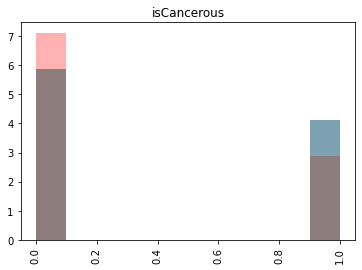

In [18]:
plt.hist(data['isCancerous'], alpha=0.3, color='b', density=True)
plt.hist(data_extra['isCancerous'], alpha=0.3, color='r', density=True)
plt.hist(data['isCancerous'], alpha=0.3, color='g', density=True)
plt.title('isCancerous')
plt.xticks(rotation='vertical')

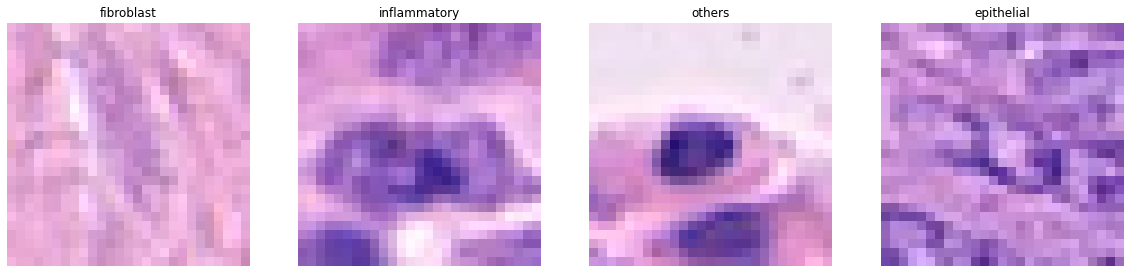

In [47]:
unique_cell_types = data['cellTypeName'].unique()
selected_images = {}

for cell_type in unique_cell_types:
    images_of_cell_type = data[data['cellTypeName'] == cell_type]
    selected_image = images_of_cell_type.sample(n=1).iloc[0]
    selected_images[cell_type] = selected_image['ImageName']

fig, axes = plt.subplots(1, len(unique_cell_types), figsize=(len(unique_cell_types) * 5, 5))

for ax, (cell_type, image_path) in zip(axes, selected_images.items()):
    img = mpimg.imread("./Image_classification_data/patch_images/" + image_path)
    ax.imshow(img)
    ax.set_title(cell_type)
    ax.axis('off')

plt.show()

In [48]:
import tensorflow as tf
pseudo_labels_value = tf.constant([0, 1, 2, 0, 2, 1], dtype=tf.int64)
category_2_mask = tf.equal(pseudo_labels_value, 2)
print(category_2_mask)

Metal device set to: Apple M1 Pro
tf.Tensor([False False  True False  True False], shape=(6,), dtype=bool)
